In [8]:
# Import Libraries
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
from datetime import datetime, timedelta
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from collections import Counter
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from math import pi


In [28]:
with open("../data/interim/02_customer_data_preprocessed.pkl","rb") as file:
     customer_df = pickle.load(file)
     
customer_df.head(5)

,CustomerID,Days_Since_Last_Purchase,Total_Purchases,Total_Spent,Average_Value/Purchase,Total_Products_Bought,Cancellation_Frequency,Trend,Average_Monthly_Spending,Is_Outlier
0,12346.0,325,2,0.00,0.00,0,1.0,0.000000,0.000000,False
1,12347.0,2,7,4310.00,615.71,2458,0.0,4.486071,615.714286,False
2,12348.0,75,4,1437.24,359.31,2332,0.0,-100.884000,359.310000,False
3,12349.0,18,1,1457.55,1457.55,630,0.0,0.000000,1457.550000,False
4,12350.0,310,1,294.40,294.40,196,0.0,0.000000,294.400000,False


In [27]:
with open("../data/interim/03_customer_data_preprocessed.pkl", "rb") as file:
    df = pickle.load(file)
    
df.head(5)

,CustomerID,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,12346.0,-2.137939,-0.994505,0.182445,2.084951,0.090332,0.200406,0
1,12347.0,2.732179,1.149014,-0.395158,-0.603836,0.991247,0.097086,0
2,12348.0,0.737009,0.426508,0.313504,-0.232665,1.063404,0.780635,0
3,12349.0,2.781008,5.658191,-0.226085,-0.970128,-2.229524,-0.666519,0
4,12350.0,-1.514532,0.834310,0.020027,1.706037,0.218188,-0.056013,0


In [10]:
# Compute number of customers
num_observations = len(df)

# Separate the features and the cluster labels
X = df.drop('Cluster', axis=1)
clusters = df['Cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
for row in table_data:
    print(f"{row[0]}: {row[1]}")

Number of Observations: 4204
Silhouette Score: 0.5903946369428397
Calinski Harabasz Score: 16752.925546492323
Davies Bouldin Score: 0.4994083630866615


In [32]:
# Merge the dataframes based on 'CustomerID'
merged_df = pd.merge(df, customer_df, on='CustomerID', how='inner')

# Select only the desired columns
desired_columns = ['CustomerID', 'Days_Since_Last_Purchase', 'Total_Purchases', 'Total_Spent', 'Average_Value/Purchase', 'Total_Products_Bought', 'Cancellation_Frequency', 'Trend', 'Average_Monthly_Spending', 'Cluster']

merged_df = merged_df[desired_columns]

merged_df.head(5)

,CustomerID,Days_Since_Last_Purchase,Total_Purchases,Total_Spent,Average_Value/Purchase,Total_Products_Bought,Cancellation_Frequency,Trend,Average_Monthly_Spending,Cluster
0,12346.0,325,2,0.00,0.00,0,1.0,0.000000,0.000000,0
1,12347.0,2,7,4310.00,615.71,2458,0.0,4.486071,615.714286,0
2,12348.0,75,4,1437.24,359.31,2332,0.0,-100.884000,359.310000,0
3,12349.0,18,1,1457.55,1457.55,630,0.0,0.000000,1457.550000,0
4,12350.0,310,1,294.40,294.40,196,0.0,0.000000,294.400000,0


In [35]:
# Upload to processed folder
merged_df.to_pickle("../data/processed/customer_data_processed.pkl")

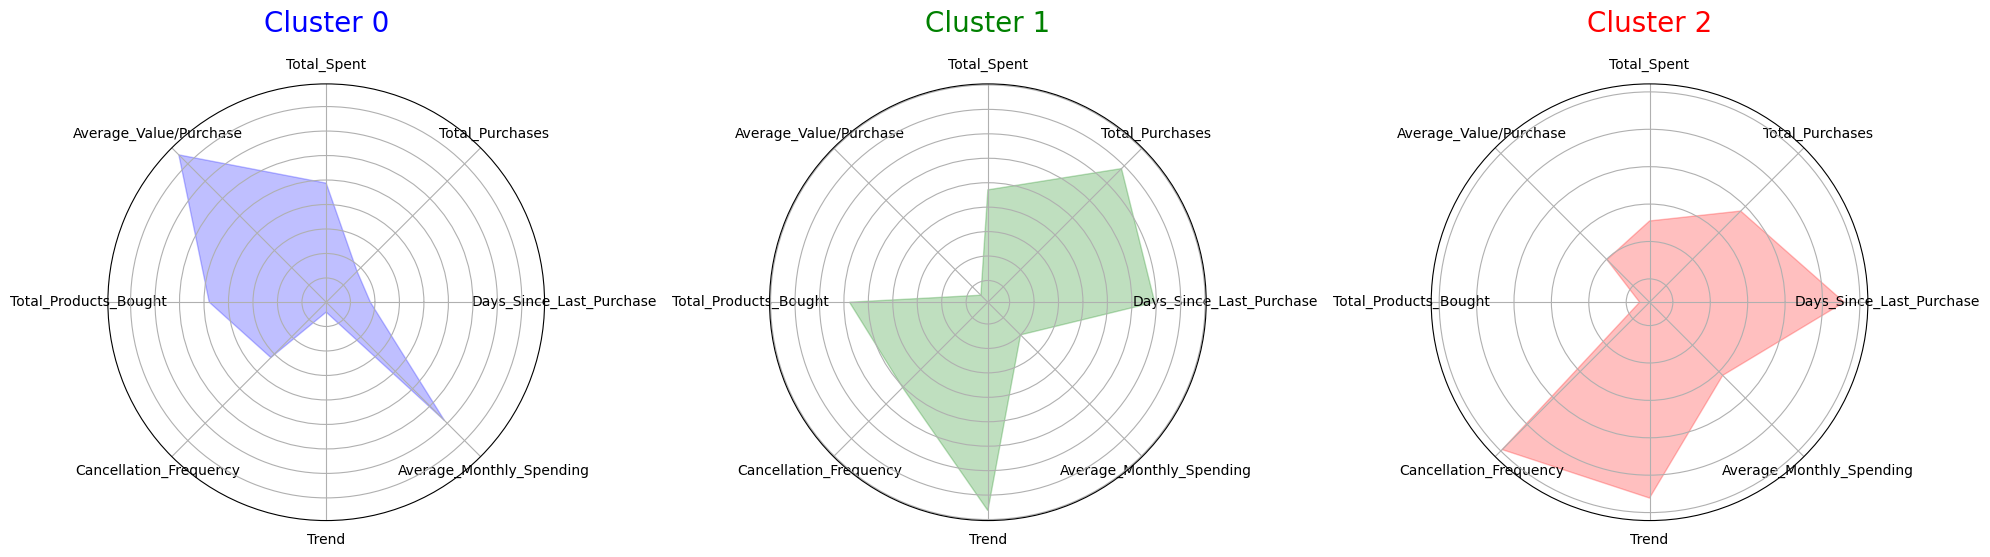

In [33]:
#List of column names
attributes = ['Days_Since_Last_Purchase', 'Total_Purchases', 'Total_Spent', 'Average_Value/Purchase', 'Total_Products_Bought', 'Cancellation_Frequency', 'Trend', 'Average_Monthly_Spending']

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(merged_df[attributes])

# Create a figure with subplots for each cluster
fig, axes = plt.subplots(1, 3, figsize=(20, 10), subplot_kw=dict(polar=True))

# Cluster colors
colors = ['b', 'g', 'r']

# Number of clusters
n_clusters = 3

# Iterate over each cluster
for i, ax in enumerate(axes):
    # Data for the current cluster
    data = data_standardized[merged_df['Cluster'] == i].mean(axis=0).tolist()
    data += data[:1]  # Complete the loop

    # Set the cluster label as the title
    ax.set_title(f'Cluster {i}', color=colors[i], size=20, y=1.1)

    # Create angles for each axis
    angles = [n / float(len(attributes)) * 2 * pi for n in range(len(attributes))]
    angles += angles[:1]

    # Plot data
    ax.fill(angles, data, color=colors[i], alpha=0.25)

    # Set labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    ax.set_yticklabels([])  # Hide y-axis labels

# Add a legend
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

plt.tight_layout()
plt.show()